Create KNN and OLS regressions with the data and compare/contrast them.

I chose apparent temperature as the outcome variable and will try to predict it using the other information provided.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors
from sklearn import linear_model
import seaborn as sns
import datetime
from scipy import stats
%matplotlib inline

In [2]:
weather = pd.read_csv('weatherHistory.csv')

In [3]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
knn = neighbors.KNeighborsRegressor(n_neighbors=20)

In [11]:
X = pd.DataFrame({
    'Humidity': stats.zscore(weather.Humidity),
    'Visibility': stats.zscore(weather['Visibility (km)']),
    'Pressure' : stats.zscore(weather['Pressure (millibars)'])
})
Y = weather['Apparent Temperature (C)']
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

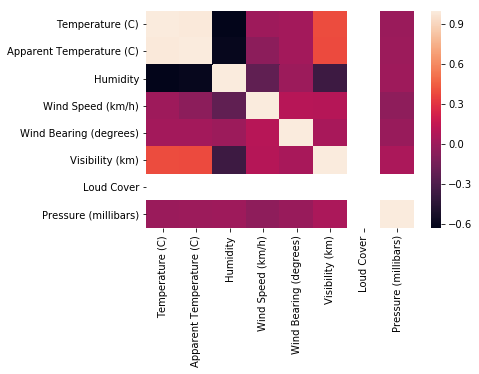

In [6]:
corrmat = weather.corr()
sns.heatmap(corrmat)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X, Y, cv=5)

array([0.47589493, 0.47762454, 0.46269998, 0.40017208, 0.39413415])

Ok, so it didn't work so well with k nearest neighbors. Whatcha gonna do?
Maybe linear regression will be better?

In [8]:
regr = linear_model.LinearRegression()

In [9]:
regr.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
cross_val_score(regr, X, Y)

array([0.39610472, 0.40027028, 0.34597481])

k nearest neighbors does not need the features to be linearly correlated with the outcome in the same way that linear regression does.